## 0. Install and Import Dependencies

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
from IPython.display import Image

## 1. Read in Image, Grayscale and Blur

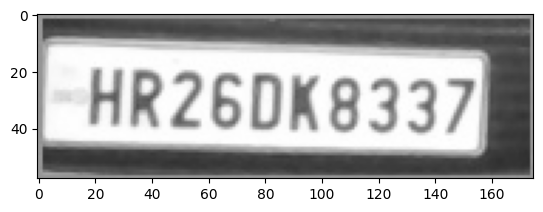

In [11]:
img = cv2.imread(r"N:\projects\Car-Number-Plates-Detection-main\Car-Number-Plates-Detection-main\plates\scaned_img_0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

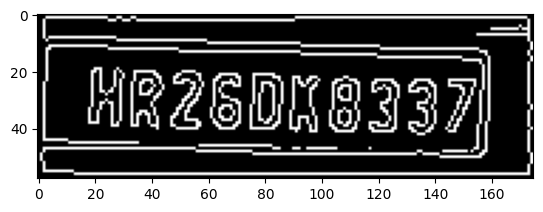

In [12]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [13]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [14]:
location = 0
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) >= 4:
        location = approx
        break

In [15]:
location

array([[[  2,   2]],

       [[159,  15]],

       [[155,  50]],

       [[  2,  55]],

       [[173,  56]],

       [[172,   1]]], dtype=int32)

In [16]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

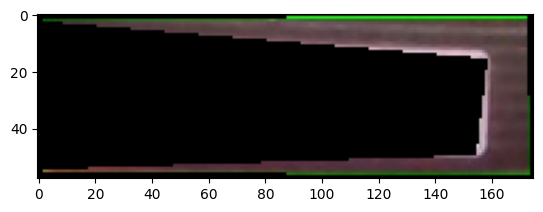

In [17]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [18]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

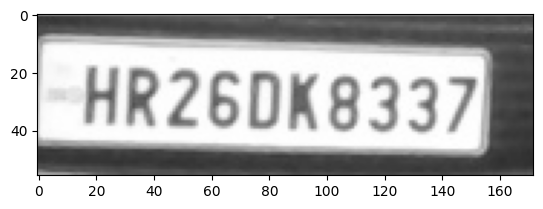

In [19]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [20]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 12], [159, 12], [159, 49], [10, 49]],
  'HRZSDK8337',
  0.6081287616568893)]

## 5. Render Result

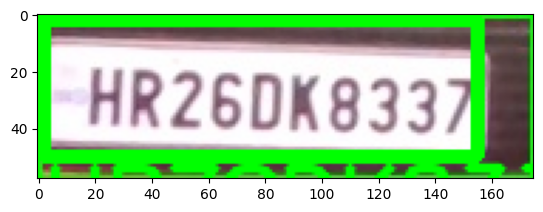

In [21]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))